In [1]:
from unet_project.image_utils import ImageUtils
from unet_project.data_augmentation import DataAugmentation
from unet_project.u_net import Unet
from unet_project.create_patches import PatchesCreator
from skimage.io import imshow
from matplotlib import pyplot as plt
import numpy as np
import cv2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from skimage.io import imshow
from matplotlib import pyplot as plt
import random
from keras.models import load_model

Using TensorFlow backend.


In [20]:
path_to_imgs = '/home/ajuska/Dokumenty/Skola/diplomka/test_folder/imgs/'
path_to_masks = '/home/ajuska/Dokumenty/Skola/diplomka/test_folder/masks/'
img_height = 224
img_width = 224
img_channels = 3

image_utils = ImageUtils(path_to_imgs, path_to_masks, img_height, img_width)
imgs_masks = image_utils.get_preprocessed_images()

data_augmentor = DataAugmentation(imgs_masks, how_many=1)
aug_imgs, aug_masks = data_augmentor.extend_database()

patches_creator = PatchesCreator(aug_imgs, aug_masks, img_height, img_width)
imgs_patches, masks_patches = patches_creator.create_patches()

100%|██████████| 16/16 [00:00<00:00, 117.61it/s]

Loading images.

Loading masks.



  0%|          | 0/16 [00:00<?, ?it/s]/home/ajuska/Dokumenty/Skola/diplomka/diplomka/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
 19%|█▉        | 3/16 [00:00<00:00, 17.89it/s]


Preprocessing images.

Extending database.


100%|██████████| 16/16 [00:01<00:00, 13.25it/s]


Creating patches.


In [21]:
trainX = np.array([x/255 for x in imgs_patches])
trainY = np.array([x/255 for x in masks_patches])

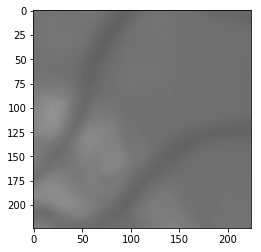

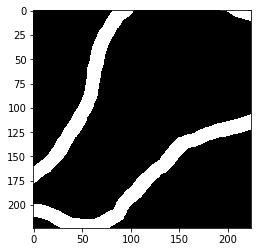

In [22]:
plt.figure()
plt.imshow(trainX[110])
plt.figure()
plt.imshow(np.squeeze(trainY[110]), cmap='gray')

In [23]:
unet = Unet(img_height=img_height, img_width=img_width, img_channels=img_channels)
model = unet.create_model()
earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('model-test.h5', verbose=1, save_best_only=True)
results = model.fit(trainX, trainY, validation_split=0.1, batch_size=32, epochs=10,
                    callbacks=[earlystopper, checkpointer])

Creating model.
Train on 360 samples, validate on 40 samples
Epoch 1/10
360/360 [==============================] - 366s 1s/step - loss: 0.6015 - acc: 0.6801 - val_loss: 0.4540 - val_acc: 0.8538

Epoch 00001: val_loss improved from inf to 0.45396, saving model to model-test.h5
Epoch 2/10
360/360 [==============================] - 289s 802ms/step - loss: 0.4607 - acc: 0.8547 - val_loss: 0.4075 - val_acc: 0.8595

Epoch 00002: val_loss improved from 0.45396 to 0.40753, saving model to model-test.h5
Epoch 3/10
360/360 [==============================] - 257s 715ms/step - loss: 0.4185 - acc: 0.8720 - val_loss: 0.3881 - val_acc: 0.8589

Epoch 00003: val_loss improved from 0.40753 to 0.38806, saving model to model-test.h5
Epoch 4/10
360/360 [==============================] - 222s 617ms/step - loss: 0.3943 - acc: 0.8743 - val_loss: 0.3797 - val_acc: 0.8582

Epoch 00004: val_loss improved from 0.38806 to 0.37967, saving model to model-test.h5
Epoch 5/10
160/360 [============>.................] - 

KeyboardInterrupt: 

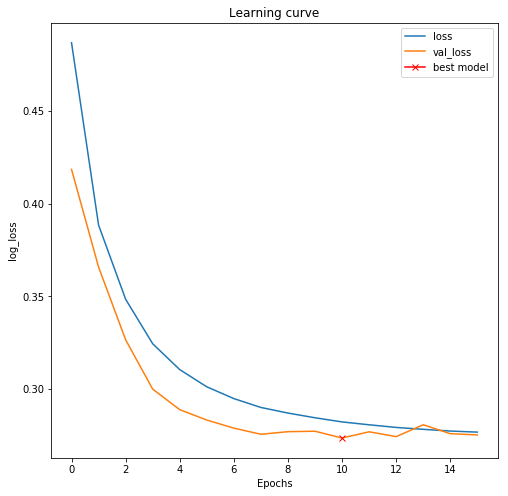

In [6]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [1]:
preds = model.predict(trainX[10:20])
preds_t = (preds > 0.15)

NameError: name 'model' is not defined

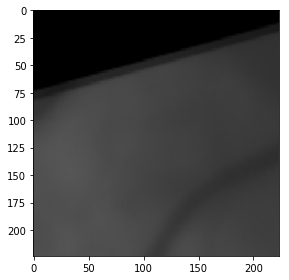

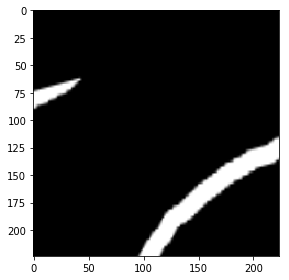

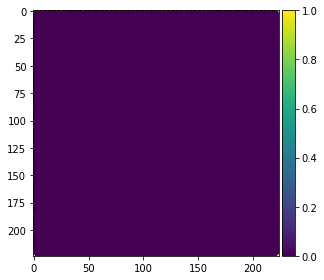

In [9]:
imshow(trainX[18])
plt.show()
imshow(np.squeeze(trainY[18]))
plt.show()
imshow(np.squeeze(preds_t[6]))
plt.show()